In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
eps=0.001
funk=0
alif=200
side=np.array([0.5,0.5])
alf=1#reflection
betta=0.5#constract
gamma=2#extension
def roz(x):
  global funk
  funk+=1
  return alif*(x[0]**2-x[1])**2+(x[0]-1)**2
def squ(x):
  global funk
  funk+=1
  return 5*x[0]*x[0] + 4*x[0]*x[1]+2*x[1]*x[1]+4*math.sqrt(5)*(x[0]+x[1])-14
def norm(x):
    nor=0
    for i in range(2):
        nor +=x[i]*x[i]
    return math.sqrt(nor)
def regul(x0,f):
  k=23
  global unsv1
  unsv1.append(x0)
  v1=np.array([0,0])
  v2=np.array([0,0])
  v1[0]=x0[0]+side[0]*((math.sqrt(3)+1)/(2))
  v1[1]=x0[1]+side[1]*((math.sqrt(3)-1)/(2))
  v2[0]=v1[1]
  v2[1]=v1[0]
  v3=x0
  ml=1
  sk=1
  while(sk>eps*eps*eps or k<20):#sk>eps*eps*eps or k<20
    k+=1
    fv1=f(v1)
    fv2=f(v2)
    fv3=f(v3)
    if(fv1==fv2 or fv1==fv3):
      fv1+=0.01
    if(fv2==fv3 or fv1==fv3):
      fv3+=0.03
    adict=dict([(fv1,v1),(fv2,v2),(fv3,v3)])
    points=sorted(adict.items(), key=lambda x: x[0])

    b=points[0][1]
    g=points[1][1]
    w=points[2][1]
    mid=(g+b+w)/3
    unsv1.append(b)
    unsv1.append(g)
    unsv1.append(w)

    xr=mid+2*(mid-w)

    if(f(xr)<f(w)):
      w=xr
    else:
      w=w-(w-b)/2
      g=g-(g-b)/2

    v1=w
    v2=g
    v3=b


    ml=max(norm(v1-v2),norm(v1-v3),norm(v2-v3))
    fc=f((v1+v2+v3)/3)
    sk=((f(v1)-fc)**2+(f(v2)-fc)**2+(f(v3)-fc)**2)/3
  #print(v3)
  #print(v2)
  #print(v1)
  print((v1+v2+v3)/3)
  print(k)

def nelder(x0,f):
  global unsv2,unsv3
  unsv2.append(x0)
  unsv3.append(x0)
  v1=np.array([0,0])
  v2=np.array([0,0])
  v1[0]=x0[0]+side[0]*((math.sqrt(3)+1)/(2))
  v1[1]=x0[1]+side[1]*((math.sqrt(3)-1)/(2))
  v2[0]=v1[1]
  v2[1]=v1[0]
  v3=x0
  k=0
  ml=1
  sk=1
  while(ml>eps):#sk>eps*eps*eps  ml>eps
    k+=1
    fv1=f(v1)
    fv3=f(v3)
    fv2=f(v2)
    if(fv1==fv2 or fv1==fv3):
      fv1+=0.00001
    if(fv2==fv3):
      fv3+=0.0001
    adict=dict([(fv1,v1),(fv2,v2),(fv3,v3)])
    points=sorted(adict.items(), key=lambda x: x[0])

    b=points[0][1]
    g=points[1][1]
    w=points[2][1]
    unsv2.append(b)
    unsv2.append(g)
    unsv2.append(w)
    mid=(g+b)/2
    unsv3.append((g+b+w)/3)

    xr=mid+alf*(mid-w)
    fxr=f(xr)
    if(fxr<f(g)):
      w=xr
    else:
      if(fxr<f(w)):
        w=xr
      c=(w+mid)/2
      if(f(c)<f(w)):
        w=c
    if(fxr<f(b)):
      xe=mid+gamma*(xr-mid)
      if(f(xe)<fxr):
        w=xe
      else:
        w=xr
    if(fxr>f(g)):
      xc=mid+betta*(w-mid)
      if(f(xc)<f(w)):
        xc2=mid+0.5*betta*(w-mid)
        if(f(xc2)<f(xc)):
          w=xc2
        else:
          w=xc
      else:
        w=w+(w-b)/2
        g=g+(g-b)/2
    v1=w
    v2=g
    v3=b
    unsv2.append(w)
    ml=max(norm(v1-v2),norm(v1-v3),norm(v2-v3))
    fc=f((v1+v2+v3)/3)
    sk=((f(v1)-fc)**2+(f(v2)-fc)**2+(f(v3)-fc)**2)/3
  #print(v3)
  #print(v2)
  #print(v1)
  print((v1+v2+v3)/3)
  print(k)


x0=np.array([-1,-2])
unsv1=[]
unsv2=[]
unsv3=[]
regul(x0,roz)
funk=0
regul(x0,squ)
print(funk)
funk=0
nelder(x0,roz)
print(funk)
funk=0
nelder(x0,squ)
print(funk)

[1.00008138 1.00024414]
39
[ 6.51041667e-04 -2.23632812e+00]
36
117
[0.99926497 0.99856909]
28
413
[-1.52182775e-04 -2.23555533e+00]
15
239


<a list of 45 text.Text objects>

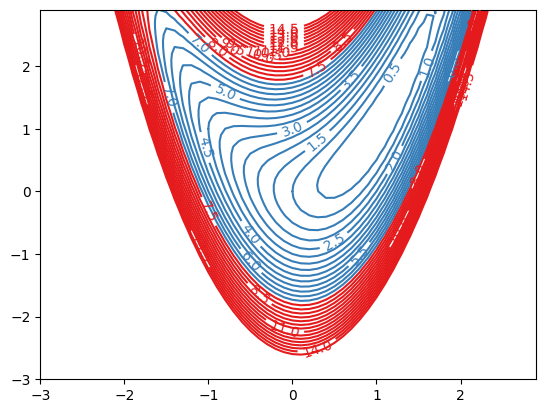

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 2*(z[0]**2 - z[1])**2 + (z[0] - 1)**2
X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)


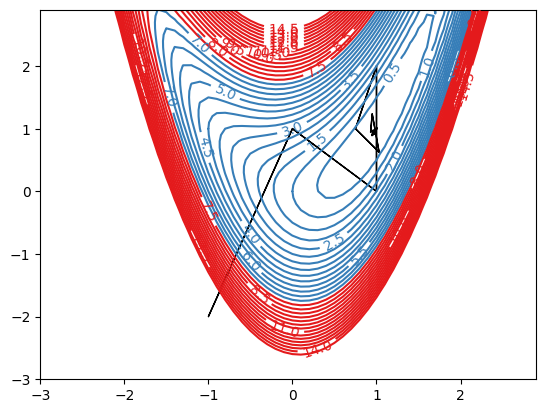

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

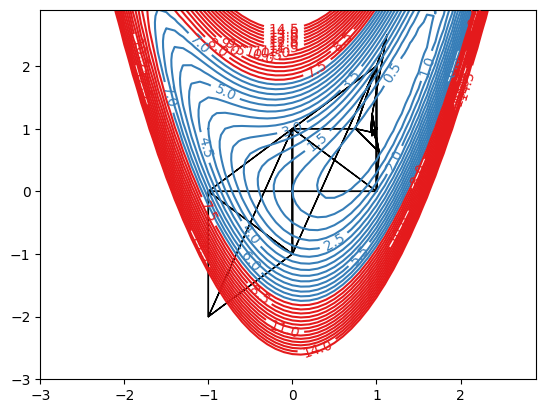

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

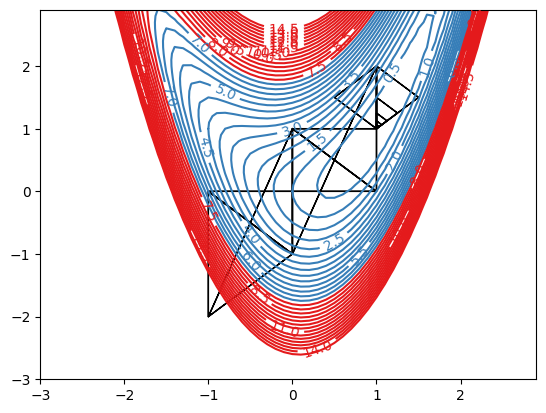

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

<a list of 95 text.Text objects>

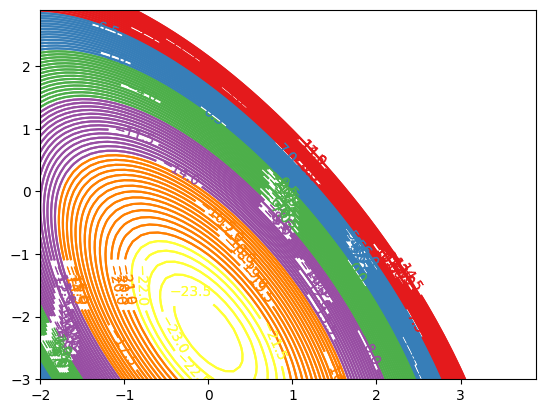

In [ ]:
from sympy import Symbol
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
dimention = 2
z = [Symbol('z_'+str(i+1)) for i in range(dimention)]
func = 5*z[0]*z[0] + 4*z[0]*z[1]+2*z[1]*z[1]+4*math.sqrt(5)*(z[0]+z[1])-14

X_0 = [-1,1]

def func_def(f):
    return lambda x: f.subs(list(zip(z,x)))
x = np.arange(-2.0, 4.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

Z = np.ones((60,60))
X, Y = np.meshgrid(x, y)
for i in range(len(X)):
 for j in range(len(X[0])):
    Z[i][j]=func_def(func)([X[i][j], Y[i][j]])
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

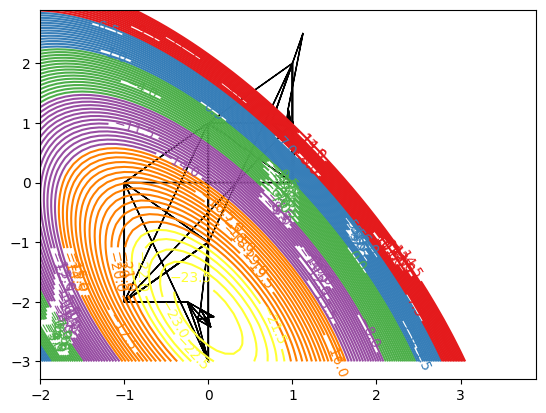

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv2:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

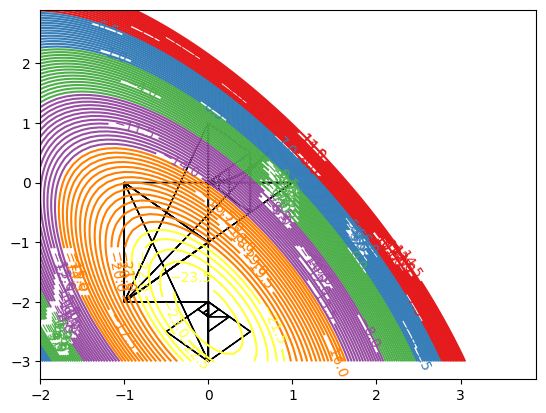

In [ ]:
cset = plt.contour(X,Y,Z,np.arange(-50,15,0.5), cmap=cm.Set1_r)
plt.clabel(cset, inline=True)

t_x = []
t_y = []
for i in unsv1:
    t_x.append(i[0])
    t_y.append(i[1])
for i in range(1,len(t_x)):
  plt.arrow(t_x[i - 1],t_y[i - 1],t_x[i] - t_x[i - 1],t_y[i] - t_y[i - 1],shape = "full")
#plt.scatter(t_x,t_y,s = 2,color = 'y')

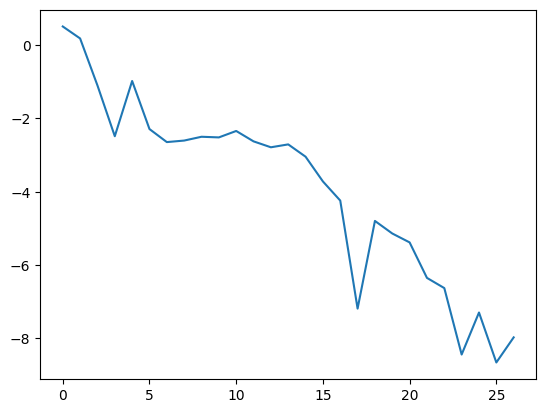

In [ ]:
k=np.arange(0,len(unsv3)-2,1)
s=[]
for i in range(2,len(unsv3)):
  unsv3[i][0]-=1
  unsv3[i][1]-=1
  s.append(norm(unsv3[i]))

plt.plot(k,np.log(s))
#plt.scatter(np.log(k),log ,color = 'y')
plt.show()